# San Francisco Rental Prices Dashboard

In this notebook, you will compile the visualizations from the previous analysis into functions that can be used for a Panel dashboard.

In [55]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv

In [56]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("MAPBOX_API_KEY")

# Set the Mapbox API
px.set_mapbox_access_token(mapbox_token)

# Import Data

In [57]:
# Import the CSVs to Pandas DataFrames
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")

file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)

- - -

## Panel Visualizations

In this section, you will copy the code for each plot type from your analysis notebook and place it into separate functions that Panel can use to create panes for the dashboard. 

These functions will convert the plot object to a Panel pane.

Be sure to include any DataFrame transformation/manipulation code required along with the plotting code.

Return a Panel pane object from each function that can be used to build the dashboard.

Note: Remove any `.show()` lines from the code. We want to return the plots instead of showing them. The Panel dashboard will then display the plots.

In [60]:
# Define Panel Visualization Functions
def housing_units_per_year():
    """Housing Units Per Year."""
    
    # Calculate the mean number of housing units per year (hint: use groupby) 
    avg_housing_units = sfo_data.groupby(['year']).mean()['housing_units']
    
    # Use the Pandas plot function to plot the average housing units per year.
    # Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
    
    avg_housing_units_plot = avg_housing_units.plot.bar(ylim=(370000, 387500), figsize=(10,5), title='Housing Units in San Francisco')
    plt.xlabel('Year')
    plt.ylabel('Housing Units')
    
    return avg_housing_units_plot

def average_gross_rent():
    """Average Gross Rent in San Francisco Per Year."""
    
    # Calculate the average gross rent and average sales price per square foot
    avg_prices_per_yr = (
        sfo_data[['sale_price_sqr_foot','gross_rent']]
        .groupby('year')
        .mean()
    )
    # Create variables for Average Gross Rent and Average Sales Price Per Square Foot
    avg_gross_rent = avg_prices_per_yr['gross_rent']
    
    # Plot the Average Gross Rent per Year as a Line Chart 
    avg_gross_rent_plot = avg_gross_rent.plot.line(figsize=(10,5), title='Average Gross Rent in San Francisco')
    plt.xlabel('Year')
    plt.ylabel('Gross Rent')
    
    return avg_gross_rent_plot
    
def average_sales_price():
    """Average Sales Price Per Year."""
    # Calculate the average gross rent and average sales price per square foot
    avg_prices_per_yr = (
        sfo_data[['sale_price_sqr_foot','gross_rent']]
        .groupby('year')
        .mean()
    )
    
    # Create variables for Average Sales Price Per Square Foot
    ave_sales_price = avg_prices_per_yr['sale_price_sqr_foot']
    
    # Plot the Average Sales Price per Year as a line chart
    ave_sales_price_plot = ave_sales_price.plot.line(figsize=(10,5), title='Average Sales Price per Square Foot')
    plt.xlabel('Year')
    plt.ylabel('Average Sales Price')
    
    return ave_sales_price_plot

def average_price_by_neighborhood():
    """Average Prices by Neighborhood."""
    
    # Group by year and neighborhood and then create a new dataframe of the mean values
    avg_prices_nbh = sfo_data.groupby(['year','neighborhood']).mean({'sale_price_sqr_foot'}).reset_index()
    
    # Import necessary functions that creates interaction with graph
    
    import panel as pn
    from panel.interact import interact
    from panel import widgets
    pn.extension()

    # Define function to choose neighborhood
    def plot_avg_prices(neighborhood):
        return avg_prices_nbh.hvplot.line(x='year',   
                 y='sale_price_sqr_foot',groupby='neighborhood',
                 ylabel='Avg. Sale Price per Square Foot',
                 )
   
    # Declare one list of neighborhoods to be used in a Panel select list
    list_of_neighborhoods = avg_prices_nbh['neighborhood'].unique()
    plot_avg_prices(list_of_neighborhoods)
   
    return avg_prices_nbh.hvplot.line(x='year',   
                 y='sale_price_sqr_foot',groupby='neighborhood',
                 ylabel='Avg. Sale Price per Square Foot',
                 )

def top_most_expensive_neighborhoods():
    """Top 10 Most Expensive Neighborhoods."""
    
    # Getting the data from the top 10 expensive neighborhoods
    nbh_mean_prices = sfo_data.groupby(['neighborhood']).mean({'sale_price_sqr_foot'})
    
    # Sort the values to obtain the top 10 most expensive neighborhoods on average
    top_10_nbh = nbh_mean_prices.sort_values(by='sale_price_sqr_foot', ascending=False).reset_index()
    top_10_nbh = top_10_nbh.iloc[0:10]
    
    top_10_ave_prices = top_10_nbh.set_index(['neighborhood'])['sale_price_sqr_foot']
    
    top_10_ave_prices_plot = top_10_ave_prices.hvplot.bar(xlabel= 'Neighborhood',
                            ylabel='Avg Sales Price per Sqr Ft',
                            title='Top 10 Expensive Neighborhoods in SFO', rot=90)
    return top_10_ave_prices_plot

def parallel_coordinates():
    """Parallel Coordinates Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    nbh_mean_prices = sfo_data.groupby(['neighborhood']).mean({'sale_price_sqr_foot'})
    
    # Sort the values to obtain the top 10 most expensive neighborhoods on average
    top_10_nbh = nbh_mean_prices.sort_values(by='sale_price_sqr_foot', ascending=False).reset_index()
    top_10_nbh = top_10_nbh.iloc[0:10]
    
    # Parallel Coordinates Plot
    parallel_coordinates_plot = px.parallel_coordinates(top_10_nbh, color='sale_price_sqr_foot')
    
    return parallel_coordinates_plot
    
def parallel_categories():
    """Parallel Categories Plot."""
    
    # Getting the data from the top 10 expensive neighborhoods
    nbh_mean_prices = sfo_data.groupby(['neighborhood']).mean({'sale_price_sqr_foot'})
    
    # Sort the values to obtain the top 10 most expensive neighborhoods on average
    top_10_nbh = nbh_mean_prices.sort_values(by='sale_price_sqr_foot', ascending=False).reset_index()
    top_10_nbh = top_10_nbh.iloc[0:10]
    
    parallel_categories_plot = px.parallel_categories(
        top_10_nbh,
        dimensions=["neighborhood", "sale_price_sqr_foot", "housing_units", "gross_rent"],
        color="sale_price_sqr_foot",
        color_continuous_scale=px.colors.sequential.Inferno,
    )
    return parallel_categories_plot

def neighborhood_map():
    """Neighborhood Map"""
    
    # Calculate the mean values for each neighborhood
    nbh_avg_values = sfo_data.groupby(['neighborhood']).mean({'sale_price_sqr_foot'}).reset_index()
    
    # Join the average values with the neighborhood locations
    combine_values_nbh = pd.concat([df_neighborhood_locations, nbh_avg_values], axis=1, sort=True).drop(columns=['neighborhood'])
    
    # Rename Columns
    combine_values_nbh = combine_values_nbh.rename(columns={
    'sale_price_sqr_foot': 'Sales Price/Sqr Ft',
    'housing_units': 'Housing Units',
    'gross_rent': 'Gross Rent'
    })
    
    nbh_map = px.scatter_mapbox(
    combine_values_nbh,
        lat="Lat",
        lon="Lon",
        size="Sales Price/Sqr Ft",
        color="Gross Rent",
        hover_name="Neighborhood",
        color_continuous_scale=px.colors.cyclical.IceFire,
        title="Average Sales Price Per Square Foot and Gross Rent in San Fancisco"
    )
    return nbh_map

## Panel Dashboard

In this section, you will combine all of the plots into a single dashboard view using Panel. Be creative with your dashboard design!

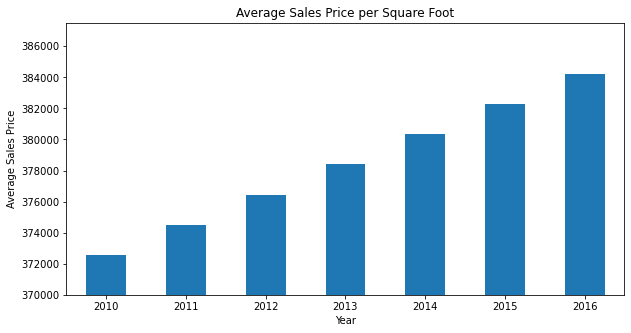

In [61]:
# Create panels to structure the layout of the dashboard
geo_column = pn.Column(
    "## Real Estate Analysis of San Fancisco from 2010 to 2016",
    "####**This dashboard presents the analysis of residential rental properties in San Francisco from 2010 to 2019. You can access the data by navigating through the tabs indicating above. Number of housing units, average housing rental, and average sales price per square foot in different neighborhoods  are featured in this visual analysis**", neighborhood_map(),   
)

market_analysis_column = pn.Column(
    housing_units_per_year(), average_gross_rent(), average_sales_price()
)

nbh_analysis_column = pn.Column(
    average_price_by_neighborhood(), top_most_expensive_neighborhoods()
)

parallel_column = pn.Column(
    parallel_coordinates(), parallel_categories()

)

# Create tabs
sfo_rental_dashboard = pn.Tabs(
    ("Welcome", geo_column), 
    ("Yearly Market Analysis", market_analysis_column), 
    ("Neighborhood Anaysis", nbh_analysis_column), 
    ("Parallel Plots Analysis", parallel_column), 
)

## Serve the Panel Dashboard

In [62]:
sfo_rental_dashboard.servable()
### Real Estate Analysis of San Fancisco from 2010 to 2016

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Plotly(Figure)
    [1] Column
        [0] Str(AxesSubplot)
        [1] Str(AxesSubplot)
        [2] Str(AxesSubplot)
    [2] Column
        [0] Row
            [0] HoloViews(DynamicMap)
            [1] Column
                [0] WidgetBox
                    [0] Select(margin=(20, 20, 20, 20), name='neighborhood', options=['Alamo Square', ...], value='Alamo Square', width=250)
                [1] VSpacer()
        [1] HoloViews(Bars)
    [3] Column
        [0] Plotly(Figure)
        [1] Plotly(Figure)